In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("clean_dataset.csv")

In [3]:
data.head(5)

,Unnamed: 0,title,content,category
0,0,"কালিয়াকৈরে টিফিন খেয়ে ৫০০ শ্রমিক অসুস্থ, বিক...",গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...,bangladesh
1,1,সেমিফাইনাল বাধাও পেরিয়ে গেলেন লিসিকি,এবারের উইম্বলডনটা স্মরণীয় রাখার মিশনেই নেমেছে...,sports
2,2,সংসদে খালেদার অভিযোগের জবাব দিয়েছে ভারত,জাতীয় সংসদে বিএনপি চেয়ারপারসন বিরোধীদলীয় নে...,bangladesh
3,3,পাসওয়ার্ড ভুলে যান!,সহজ পাসওয়ার্ডের কারণে অনলাইন অ্যাকাউন্ট সহজেই...,technology
4,4,চলে গেলেন মাউস উদ্ভাবক,কম্পিউটার মাউসের উদ্ভাবক ডগলাস অ্যাঙ্গেলবার্ট ...,technology


In [4]:
data['category'].value_counts()

category
bangladesh       232504
sports            49012
international     30856
entertainment     30466
economy           17245
opinion           15699
technology        12116
life-style        10852
education          9721
Name: count, dtype: int64

In [5]:
temp_df1 = data[data['category'] == 'bangladesh'][:10000]
temp_df2 = data[data['category'] == 'international'][:10000]
temp_df3 = data[data['category'] == 'entertainment'][:10000]
temp_df4 = data[data['category'] == 'economy'][:10000]
temp_df5 = data[data['category'] == 'opinion'][:10000]
temp_df6 = data[data['category'] == 'technology'][:10000]
temp_df7 = data[data['category'] == 'life-style'][:10000]
temp_df8 = data[data['category'] == 'sports'][:10000]

temp_data = pd.concat([temp_df1,temp_df2,temp_df3,temp_df4,temp_df5,temp_df6,temp_df7,temp_df8])

In [6]:
temp_data.head(5)

,Unnamed: 0,title,content,category
0,0,"কালিয়াকৈরে টিফিন খেয়ে ৫০০ শ্রমিক অসুস্থ, বিক...",গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...,bangladesh
2,2,সংসদে খালেদার অভিযোগের জবাব দিয়েছে ভারত,জাতীয় সংসদে বিএনপি চেয়ারপারসন বিরোধীদলীয় নে...,bangladesh
6,6,খালেদা দুষ্টু কথা বলেছেন: স্বরাষ্ট্রমন্ত্রী,যুক্তরাষ্ট্রের বাজারে জিএসপি-সুবিধা বন্ধ প্রসঙ...,bangladesh
7,7,আরও ১১টি বিমা কোম্পানি অনুমোদন পেল,১১টি বিমা কোম্পানিকে লাইসেন্সের অনুমোদন বিমা উ...,bangladesh
8,8,সিএনজি স্টেশনে কাল থেকে অনির্দিষ্টকালের ধর্মঘট,ম্যাজিস্ট্রেটের সিলেটে সিএনজি স্টেশনের এক মালি...,bangladesh


In [7]:
temp_data = temp_data.sample(frac = 1)

In [8]:
temp_data.head(5)

,Unnamed: 0,title,content,category
34205,34205,"ব্যালন ডি’অরের ফলাফল ফাঁস, আবারও জিতছেন মেসি!",এবারও লিওনেল মেসিই টানা পাঁচবারের নির্বাচিত চল...,sports
23309,23309,ঈদের ছবি,পূর্ণদৈর্ঘ্য প্রেম কাহিনিপরিচালক সাফিউদ্দিন শা...,entertainment
307185,307185,স্ট্রবেরি কেন খাবেন?,বাজারে স্ট্রবেরি পাবেন দেশেই চাষ ফল স্ট্রবেরির...,life-style
101727,101727,অফিসে ধ্যান!,মনকে শান্ত রাখাই সাফল্যের মূলমন্ত্র হিসেবে বিব...,life-style
72543,72543,মাদ্রিদ মাস্টার্স জিতলেন নাদাল-শারাপোভা,ক্লে কোর্টের টানা প্রতিযোগিতায় কোয়ার্টার ফাইনা...,sports


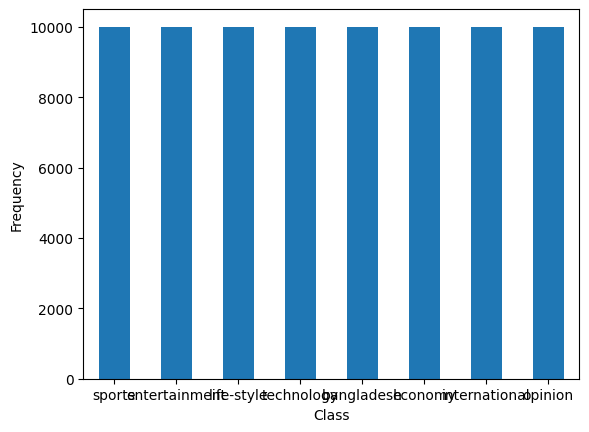

In [9]:
from matplotlib import pyplot as plt

count_classes = temp_data.category.value_counts()
count_classes.plot(kind = 'bar', rot=0)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [10]:
X = temp_data.loc[:,("content")]
Y = temp_data.loc[:,("category")]

In [42]:
Y.value_counts()

category
sports           10000
entertainment    10000
life-style       10000
technology       10000
bangladesh       10000
economy          10000
international    10000
opinion          10000
Name: count, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2)

In [43]:
print(x_train.shape)
print(y_train.value_counts())

(64000,)
category
economy          8055
bangladesh       8024
entertainment    8019
opinion          7993
life-style       7993
technology       7990
sports           7987
international    7939
Name: count, dtype: int64


In [116]:
en = LabelEncoder()
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_df=0.5)

Tf_en_x_train = tfidf.fit_transform(x_train.values.astype(str))
en_y_train = en.fit_transform(y_train)

Tf_en_x_test = tfidf.transform(x_test.values.astype(str))
en_y_test = en.transform(y_test)

MemoryError: Unable to allocate 7.68 GiB for an array with shape (64000,) and data type <U32227

In [75]:
print(Tf_en_x_train.shape)

print(en_y_train.shape)

print(Tf_en_x_test.shape)


(64000, 43493)
(64000,)
(16000, 43493)
technology
0


In [82]:
print(en_y_train[0:15])
print(en.inverse_transform(en_y_train)[0:15])

[5 7 0 1 3 0 2 3 6 6 4 5 5 4 2]
['opinion' 'technology' 'bangladesh' 'economy' 'international'
 'bangladesh' 'entertainment' 'international' 'sports' 'sports'
 'life-style' 'opinion' 'opinion' 'life-style' 'entertainment']


In [84]:
feture_class =['bangladesh','economy', 'entertainment', 'international', 'life-style', 'opinion', 'sports', 'technology']

In [20]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(Tf_en_x_train,en_y_train)

MultinomialNB()

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

nb_pred = nb_model.predict(Tf_en_x_test)
nb_acc = accuracy_score(en_y_test, nb_pred)

print(classification_report(en_y_test,nb_pred))
print(nb_model.score(Tf_en_x_test,en_y_test))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1976
           1       0.84      0.85      0.84      1945
           2       0.93      0.85      0.89      1981
           3       0.91      0.81      0.86      2061
           4       0.85      0.81      0.83      2007
           5       0.65      0.92      0.76      2007
           6       0.95      0.91      0.93      2013
           7       0.89      0.78      0.84      2010

    accuracy                           0.85     16000
   macro avg       0.86      0.85      0.85     16000
weighted avg       0.86      0.85      0.85     16000

0.849125


In [85]:
from sklearn.metrics import confusion_matrix
nb_pred2 = nb_model.predict(Tf_en_x_train)
cm = confusion_matrix(en_y_train,nb_pred2)
print(cm)
print(accuracy_score(en_y_train, nb_pred2))
# print(y_test.value_counts())

[[7115  333   49   82  108  307    3   27]
 [ 282 6877   18   51   62  499   13  253]
 [ 133   52 6972  128  211  367  110   46]
 [ 170   83   85 6536  104  833   40   88]
 [  36  101  253   34 6477  872   32  188]
 [  93  115   20  104  103 7497   25   36]
 [ 143   73   69   63   56  259 7293   31]
 [  90  378   52  104  355  443   47 6521]]
0.863875


In [30]:
class_probability = nb_model.predict_proba(Tf_en_x_train)
print(class_probability)

[[4.16453968e-03 4.77525807e-02 6.76183481e-03 ... 7.63471661e-01
  5.62646633e-03 1.23411469e-02]
 [3.23575980e-04 1.39198528e-02 8.94395856e-03 ... 1.23149486e-02
  1.21436631e-02 9.10567289e-01]
 [3.96781588e-01 1.84831664e-01 1.80374875e-02 ... 1.00021925e-01
  1.91652020e-03 5.01669905e-02]
 ...
 [2.47519745e-01 9.53994293e-02 1.13059365e-02 ... 4.37203082e-01
  1.29098982e-02 1.73424066e-02]
 [1.08822287e-02 1.67606452e-01 1.62432110e-02 ... 3.46707152e-01
  1.07473058e-02 2.19135215e-01]
 [2.13917275e-03 6.69086313e-03 2.92669632e-02 ... 3.31380173e-02
  6.65428288e-03 7.97602023e-01]]


In [90]:
weight_list = []
for l in class_probability:
    maxi = 0
    maxi = max(l)
    weight_list.append(maxi)
print(len(weight_list))
print(weight_list)

64000
[0.7634716606252859, 0.9105672892020149, 0.3967815880162305, 0.498105626219827, 0.4498833925037301, 0.5943178996914761, 0.45866273237582883, 0.8054502997472587, 0.9921397850584219, 0.9842725763244952, 0.5917333025992824, 0.6326630327251543, 0.9980228201246937, 0.7070159526367239, 0.4086498897387891, 0.9759830216923152, 0.6078616484342446, 0.7932812384136874, 0.9789194280470667, 0.5068383834587872, 0.71738526254711, 0.997760878266776, 0.5743116097128071, 0.3867981962323591, 0.2707374786998473, 0.40762091507160014, 0.9760538216930946, 0.9038745045183956, 0.9983271732866709, 0.9220333201522317, 0.9876971863224332, 0.9980500642620983, 0.9792061542932279, 0.7264496082804306, 0.9713934247141364, 0.785917411760014, 0.9993207314321747, 0.6217349324814103, 0.9981882760157534, 0.59754331596132, 0.6825862058505189, 0.8039298139906073, 0.5254298396134945, 0.32208302108927594, 0.5986796427553082, 0.5546595886712667, 0.6223015975706528, 0.9531029389351398, 0.9980335541971826, 0.875219771435424

In [89]:
weight_list2 = []
i = 0
for l in class_probability:
    prb = l[en_y_train[i]]
    weight_list2.append(prb)
    i+=1
print(len(weight_list2))
print(weight_list2)

64000
[0.7634716606252859, 0.9105672892020149, 0.3967815880162305, 0.498105626219827, 0.37358948998098596, 0.5943178996914761, 0.45866273237582883, 0.8054502997472587, 0.9921397850584219, 0.9842725763244952, 0.37738229039230253, 0.6326630327251543, 0.9980228201246937, 0.09410019361020754, 0.4086498897387891, 0.9759830216923152, 0.13575175266519196, 0.7932812384136874, 0.9789194280470667, 0.5068383834587872, 0.71738526254711, 0.997760878266776, 0.5743116097128071, 0.3867981962323591, 0.2707374786998473, 0.40762091507160014, 0.9760538216930946, 0.9038745045183956, 0.9983271732866709, 0.9220333201522317, 0.9876971863224332, 0.9980500642620983, 0.9792061542932279, 0.7264496082804306, 0.9713934247141364, 0.785917411760014, 0.9993207314321747, 0.6217349324814103, 0.9981882760157534, 0.59754331596132, 0.6825862058505189, 0.8039298139906073, 0.32703798049354493, 0.18394992012334596, 0.5986796427553082, 0.5546595886712667, 0.6223015975706528, 0.9531029389351398, 0.9980335541971826, 0.8752197714

In [103]:
weights = {0: 0.13, 1: 0.12, 2: 0.12, 3: 0.12, 3:0.12, 4: 0.12, 5: 0.13, 6: 0.13, 7: 0.12}

In [108]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier(random_state=85)

dt_model.fit(Tf_en_x_train,en_y_train)

DecisionTreeClassifier(random_state=85)

In [109]:
dt_pred = dt_model.predict(Tf_en_x_test)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
dt_acc = accuracy_score(en_y_test, dt_pred)

print(dt_acc)

print(classification_report(en_y_test,dt_pred))
print(dt_model.score(Tf_en_x_test,en_y_test))

0.67675
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1976
           1       0.62      0.64      0.63      1945
           2       0.72      0.72      0.72      1981
           3       0.65      0.63      0.64      2061
           4       0.67      0.67      0.67      2007
           5       0.63      0.61      0.62      2007
           6       0.76      0.77      0.77      2013
           7       0.64      0.64      0.64      2010

    accuracy                           0.68     16000
   macro avg       0.68      0.68      0.68     16000
weighted avg       0.68      0.68      0.68     16000

0.67675


In [114]:
from sklearn import tree

dt_model2 = tree.DecisionTreeClassifier(random_state=42,class_weight="balanced")

dt_model2.fit(Tf_en_x_train,en_y_train,sample_weight=weight_list2)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [115]:
dt_pred2 = dt_model2.predict(Tf_en_x_test)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
dt_acc2 = accuracy_score(en_y_test, dt_pred2)

print(dt_acc2)

print(classification_report(en_y_test,dt_pred2))
print(dt_model2.score(Tf_en_x_test,en_y_test))

0.680125
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1976
           1       0.64      0.64      0.64      1945
           2       0.71      0.71      0.71      1981
           3       0.63      0.63      0.63      2061
           4       0.66      0.66      0.66      2007
           5       0.62      0.63      0.63      2007
           6       0.77      0.78      0.78      2013
           7       0.67      0.65      0.66      2010

    accuracy                           0.68     16000
   macro avg       0.68      0.68      0.68     16000
weighted avg       0.68      0.68      0.68     16000

0.680125
